In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import confusion_matrix,classification_report

from sklearn.metrics import recall_score , accuracy_score ,precision_score,f1_score,roc_auc_score
from imblearn.over_sampling import SMOTE


from sklearn.model_selection import GridSearchCV

In [2]:
# read the large csv file with specified chunksize 
df_chunk = pd.read_csv(r'E:/Chrome/loan/loan.csv', chunksize=10000,low_memory=False,parse_dates=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d','next_pymnt_d'])



In [3]:
chunk_list = []  # append each chunk df here 

# Each chunk is in df format
for chunk in df_chunk:  
    # perform data filtering 
    #chunk_filter = chunk_preprocessing(chunk)
    
    # Once the data filtering is done, append the chunk to list
    chunk_list.append(chunk)
    


In [4]:
# concat the list into dataframe 
df_concats = pd.concat(chunk_list)

In [5]:
df_concats

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN
887375,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN
887376,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN
887377,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN


In [6]:
data=df_concats.copy()

In [7]:
## Checking for missing data  

data_missing=data.isnull().sum()
data_missing_per=100*data.isnull().sum()/len(data)
data_df=pd.concat([data_missing,data_missing_per],axis=1)
data_df.columns=['missing count','percentage missing']

In [8]:
data_df.sort_values(by='percentage missing',ascending=False)

,missing count,percentage missing
dti_joint,886870,99.942640
annual_inc_joint,886868,99.942415
verification_status_joint,886868,99.942415
il_util,868762,97.902024
mths_since_rcnt_il,866569,97.654892
...,...,...
total_pymnt,0,0.000000
total_pymnt_inv,0,0.000000
total_rec_prncp,0,0.000000
total_rec_int,0,0.000000


In [9]:
data_df[data_df['percentage missing']>55].index

Index(['desc', 'mths_since_last_record', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'inq_last_12m'],
      dtype='object')

In [10]:
data.drop(data_df[data_df['percentage missing']>55].index,axis=1,inplace=True)

In [11]:
data_df.drop(data_df[data_df['percentage missing']>55].index , inplace=True)

In [12]:
data_df.sort_values(by='percentage missing',ascending=False)

,missing count,percentage missing
mths_since_last_delinq,454312,51.197065
next_pymnt_d,252971,28.507661
tot_cur_bal,70276,7.919502
tot_coll_amt,70276,7.919502
total_rev_hi_lim,70276,7.919502
emp_title,51462,5.799326
emp_length,44825,5.051393
last_pymnt_d,17659,1.990018
revol_util,502,0.056571
title,152,0.017129


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 54 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   id                          887379 non-null  int64         
 1   member_id                   887379 non-null  int64         
 2   loan_amnt                   887379 non-null  float64       
 3   funded_amnt                 887379 non-null  float64       
 4   funded_amnt_inv             887379 non-null  float64       
 5   term                        887379 non-null  object        
 6   int_rate                    887379 non-null  float64       
 7   installment                 887379 non-null  float64       
 8   grade                       887379 non-null  object        
 9   sub_grade                   887379 non-null  object        
 10  emp_title                   835917 non-null  object        
 11  emp_length                  842554 non-

In [14]:
data.dtypes.value_counts()

float64           31
object            16
datetime64[ns]     5
int64              2
dtype: int64

In [15]:
data.drop(['id','member_id','url','title','emp_title'],axis=1,inplace=True)

In [16]:
col_list=data.select_dtypes(include='object').columns
type(col_list)

pandas.core.indexes.base.Index

In [17]:
object_ser=pd.Series(index=col_list)

D:\Installation\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [18]:
for i in col_list:
    object_ser[i]=data[i].nunique()

In [19]:
object_ser

term                     2.0
grade                    7.0
sub_grade               35.0
emp_length              11.0
home_ownership           6.0
verification_status      3.0
loan_status             10.0
pymnt_plan               2.0
purpose                 14.0
zip_code               935.0
addr_state              51.0
initial_list_status      2.0
application_type         2.0
dtype: float64

In [20]:
data['application_type'].value_counts()

INDIVIDUAL    886868
JOINT            511
Name: application_type, dtype: int64

### we can drop application_type as almost all are same

In [21]:
data.drop('application_type',axis=1,inplace=True)

In [22]:
data['home_ownership'].value_counts()


MORTGAGE    443557
RENT        356117
OWN          87470
OTHER          182
NONE            50
ANY              3
Name: home_ownership, dtype: int64

In [23]:
data['purpose'].value_counts()

debt_consolidation    524215
credit_card           206182
home_improvement       51829
other                  42894
major_purchase         17277
small_business         10377
car                     8863
medical                 8540
moving                  5414
vacation                4736
house                   3707
wedding                 2347
renewable_energy         575
educational              423
Name: purpose, dtype: int64

In [24]:
data['pymnt_plan'].value_counts()

n    887369
y        10
Name: pymnt_plan, dtype: int64

### we can remove pymnt_plan as max are no only few are yes

In [25]:
data.drop('pymnt_plan',axis=1,inplace=True)

In [26]:
data['term'].value_counts()

 36 months    621125
 60 months    266254
Name: term, dtype: int64

In [27]:
data['zip_code']

0         860xx
1         309xx
2         606xx
3         917xx
4         972xx
          ...  
887374    905xx
887375    072xx
887376    378xx
887377    010xx
887378    331xx
Name: zip_code, Length: 887379, dtype: object

In [28]:
data.drop('zip_code',axis=1,inplace=True)

In [29]:
data['delinq_2yrs'].value_counts()

0.0     716961
1.0     113224
2.0      33551
3.0      11977
4.0       5327
5.0       2711
6.0       1471
7.0        784
8.0        461
9.0        284
10.0       192
11.0       121
12.0        89
13.0        64
14.0        45
15.0        28
16.0        17
18.0        11
17.0        10
19.0         8
22.0         3
21.0         2
26.0         2
20.0         2
30.0         1
39.0         1
27.0         1
29.0         1
24.0         1
Name: delinq_2yrs, dtype: int64

In [30]:
data['acc_now_delinq'].value_counts()

0.0     883236
1.0       3866
2.0        208
3.0         28
4.0          7
5.0          3
6.0          1
14.0         1
Name: acc_now_delinq, dtype: int64

### acc_now_delinq can be removed as max is 0


In [31]:
data.drop('acc_now_delinq',axis=1,inplace=True)

In [32]:
data['pub_rec'].value_counts()

0.0     751572
1.0     113266
2.0      14854
3.0       4487
4.0       1564
5.0        757
6.0        385
7.0        170
8.0        113
9.0         50
10.0        42
11.0        23
12.0        16
13.0        12
15.0         6
18.0         5
16.0         5
21.0         4
17.0         3
14.0         2
49.0         2
19.0         2
40.0         1
86.0         1
20.0         1
23.0         1
63.0         1
22.0         1
28.0         1
34.0         1
26.0         1
54.0         1
Name: pub_rec, dtype: int64

In [33]:
data['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [34]:
### we want to identify only between curren fully paid so we can remove rest

In [35]:
data=data[(data.loan_status=='Fully Paid') | (data.loan_status=='Charged Off')]

In [36]:
data['purpose'].value_counts()

debt_consolidation    148363
credit_card            50076
home_improvement       14929
other                  14277
major_purchase          6265
small_business          4746
car                     3646
medical                 2854
moving                  2028
wedding                 1955
house                   1652
vacation                1588
educational              325
renewable_energy         267
Name: purpose, dtype: int64

[]

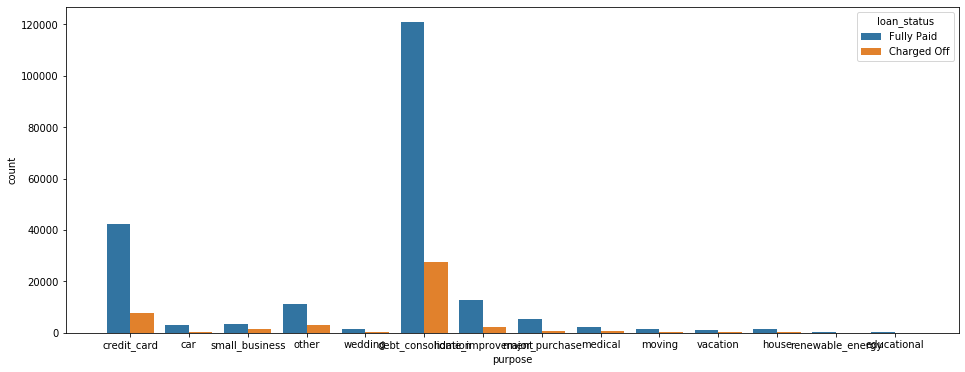

In [37]:
plt.figure(figsize=[16,6])
sns.countplot(x='purpose',data=data,hue='loan_status')
plt.plot()

In [38]:
data['policy_code'].value_counts()

1.0    252971
Name: policy_code, dtype: int64

In [39]:
data['pub_rec'].value_counts()

0.0     222043
1.0      27332
2.0       2547
3.0        676
4.0        202
5.0         92
6.0         39
7.0         19
8.0          8
9.0          5
10.0         5
11.0         1
12.0         1
15.0         1
Name: pub_rec, dtype: int64

In [40]:
data['initial_list_status'].value_counts()

f    182079
w     70892
Name: initial_list_status, dtype: int64

In [41]:
data['out_prncp'].value_counts()

0.0    252971
Name: out_prncp, dtype: int64

In [42]:
data['out_prncp_inv'].value_counts()

0.0    252971
Name: out_prncp_inv, dtype: int64

In [43]:
data['collections_12_mths_ex_med'].value_counts()

0.0    251341
1.0      1466
2.0        96
3.0         8
4.0         2
5.0         1
6.0         1
Name: collections_12_mths_ex_med, dtype: int64

In [44]:
data.drop(['out_prncp_inv','out_prncp','policy_code'],axis=1,inplace=True)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252971 entries, 0 to 887371
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   loan_amnt                   252971 non-null  float64       
 1   funded_amnt                 252971 non-null  float64       
 2   funded_amnt_inv             252971 non-null  float64       
 3   term                        252971 non-null  object        
 4   int_rate                    252971 non-null  float64       
 5   installment                 252971 non-null  float64       
 6   grade                       252971 non-null  object        
 7   sub_grade                   252971 non-null  object        
 8   emp_length                  243074 non-null  object        
 9   home_ownership              252971 non-null  object        
 10  annual_inc                  252971 non-null  float64       
 11  verification_status         252971 non-

In [46]:
data['emp_length'].value_counts()

10+ years    76881
2 years      23561
< 1 year     20886
3 years      20380
5 years      18059
1 year       16856
4 years      16197
6 years      14753
7 years      14085
8 years      11849
9 years       9567
Name: emp_length, dtype: int64

In [47]:
data['emp_length'].replace({'10+ years':10,'2 years':2,'< 1 year':1,'3 years':3,'5 years':5,'1 year':1,'4 years':4,'6 years':6
                           ,'7 years':7,'8 years':8,'9 years':9},inplace=True)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

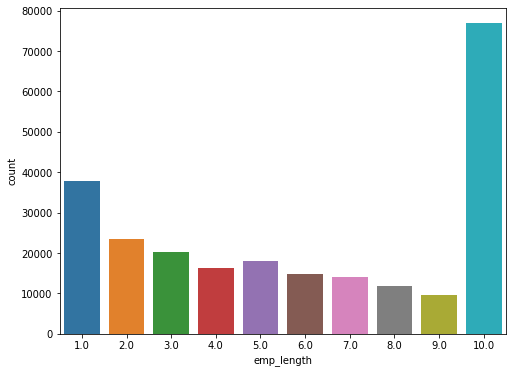

In [48]:
plt.figure(figsize=[8,6])
sns.countplot(data['emp_length'])
plt.plot

In [49]:
data['emp_length'].fillna(data.emp_length.median(),inplace=True)

In [50]:
data['emp_length'].isnull().sum()

0

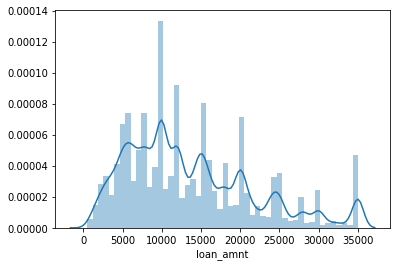

In [51]:
sns.distplot(data['loan_amnt'])

## Mostly loan is from 5000 to 20000 

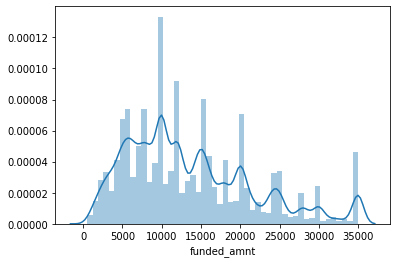

In [52]:
sns.distplot(data['funded_amnt'])

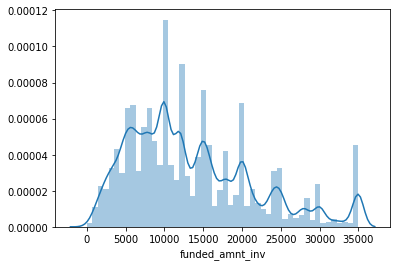

In [53]:
sns.distplot(data['funded_amnt_inv'])

### loan_amnt	funded_amnt 	funded_amnt_inv  are almost the same , so we can drop 2 of these else it can lead to multicollinearity

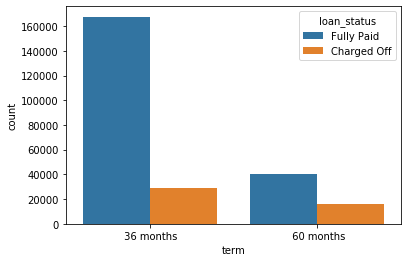

In [54]:
sns.countplot('term',data=data, hue='loan_status')

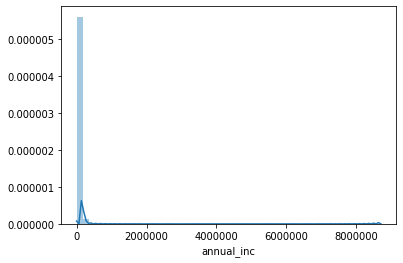

In [55]:
sns.distplot(data['annual_inc'])

In [56]:
data['annual_inc'].mean()

72538.25102541385

In [57]:
data['annual_inc'].median()

62000.0

In [58]:
data['annual_inc'].describe()

count    2.529710e+05
mean     7.253825e+04
std      5.881181e+04
min      3.000000e+03
25%      4.500000e+04
50%      6.200000e+04
75%      8.700000e+04
max      8.706582e+06
Name: annual_inc, dtype: float64

In [59]:
data['issue_month']=data.issue_d.dt.month
data['issue_year']=data.issue_d.dt.year

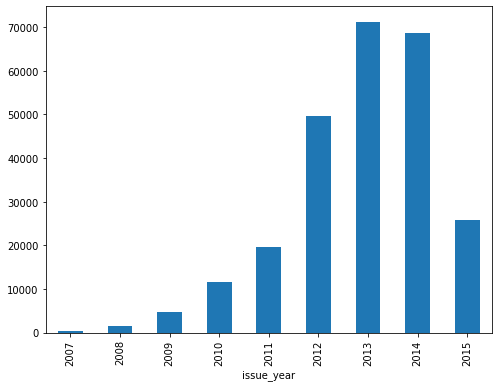

In [60]:
plt.figure(figsize=[8,6])
loan_year=data.groupby('issue_year')['loan_amnt'].count()
loan_year.plot.bar()

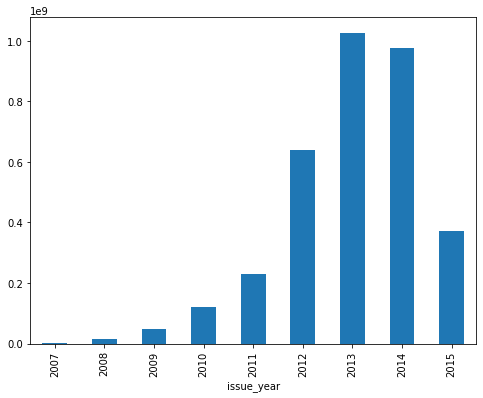

In [61]:
plt.figure(figsize=[8,6])
loan_year=data.groupby('issue_year')['loan_amnt'].sum()
loan_year.plot.bar()

### As we have deleted out 2015 data so we cannot predict for 2015 but for 2013 and 2014 mostly loans are issued

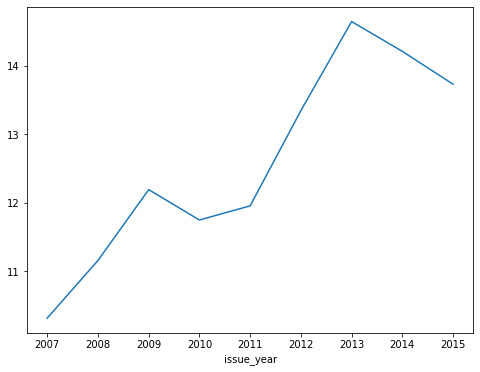

In [62]:
plt.figure(figsize=[8,6])
loan_year=data.groupby('issue_year')['int_rate'].mean()
loan_year.plot()

### Interest rate is increating with years and is highest in 2013 also it has droped for 2014 little bit 

[]

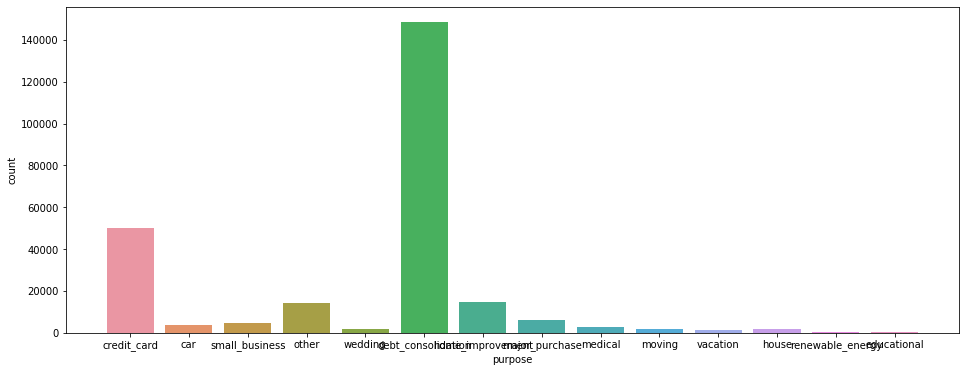

In [63]:
plt.figure(figsize=[16,6])
sns.countplot(data['purpose'])
plt.plot()

[]

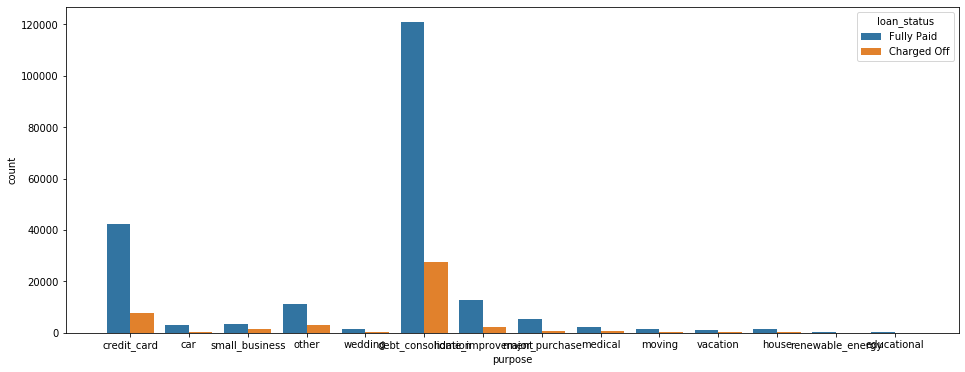

In [64]:
plt.figure(figsize=[16,6])
sns.countplot('purpose',data=data ,hue='loan_status')
plt.plot()

In [65]:
data['purpose'].value_counts()

debt_consolidation    148363
credit_card            50076
home_improvement       14929
other                  14277
major_purchase          6265
small_business          4746
car                     3646
medical                 2854
moving                  2028
wedding                 1955
house                   1652
vacation                1588
educational              325
renewable_energy         267
Name: purpose, dtype: int64

### debt_consolidation is the major purpose of loan 

[]

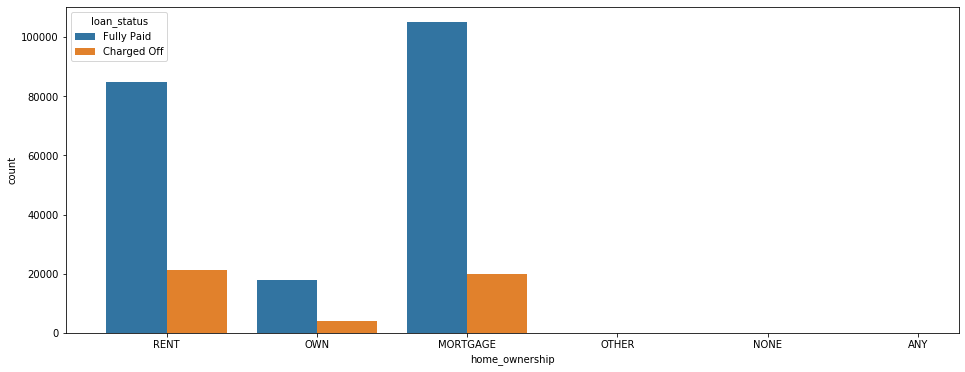

In [66]:
plt.figure(figsize=[16,6])
sns.countplot('home_ownership',data=data,hue='loan_status')
plt.plot()

In [67]:
data['home_ownership'].value_counts()

MORTGAGE    124844
RENT        105957
OWN          21985
OTHER          141
NONE            43
ANY              1
Name: home_ownership, dtype: int64

### here we can remove last 3 categories as the data is alomost negligible in them

In [68]:
index_name=data[(data.home_ownership=='OTHER')|(data.home_ownership=='NONE')|(data.home_ownership=='ANY')].index


In [69]:
index_name

Int64Index([ 13746,  32686,  32774,  33941,  34721,  34863,  34870,  34903,
             35015,  35060,
            ...
            186814, 186874, 186892, 186901, 186904, 186918, 187030, 187214,
            227181, 311334],
           dtype='int64', length=185)

In [70]:
data.drop(index_name,inplace=True)

In [71]:
data['home_ownership'].value_counts()

MORTGAGE    124844
RENT        105957
OWN          21985
Name: home_ownership, dtype: int64

## steps to create countplot with stacked columns

In [72]:
data.groupby(['loan_status', 'home_ownership']).size()

loan_status  home_ownership
Charged Off  MORTGAGE           19878
             OWN                 4025
             RENT               21311
Fully Paid   MORTGAGE          104966
             OWN                17960
             RENT               84646
dtype: int64

In [73]:
data.groupby(['loan_status', 'home_ownership']).size().reset_index()

,loan_status,home_ownership,0
0,Charged Off,MORTGAGE,19878
1,Charged Off,OWN,4025
2,Charged Off,RENT,21311
3,Fully Paid,MORTGAGE,104966
4,Fully Paid,OWN,17960
5,Fully Paid,RENT,84646


In [74]:
df_plot = data.groupby(['loan_status', 'home_ownership']).size().reset_index().pivot(columns='loan_status', index='home_ownership', values=0)

In [75]:
df_plot

loan_status,Charged Off,Fully Paid
home_ownership,,
MORTGAGE,19878,104966
OWN,4025,17960
RENT,21311,84646


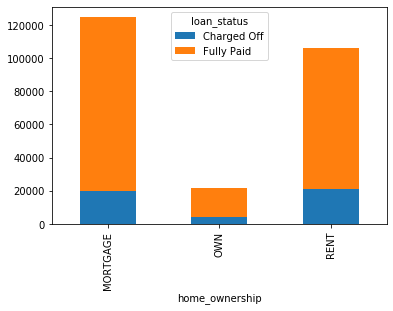

In [76]:
df_plot.plot(kind='bar', stacked=True)

### dti ::  A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

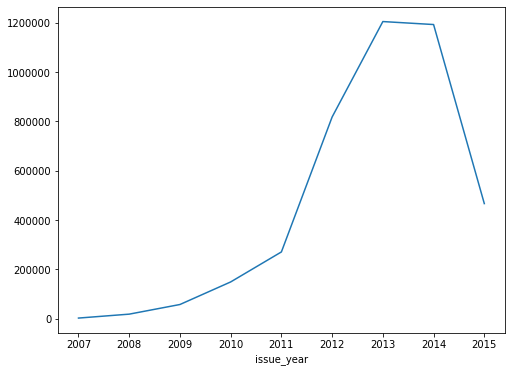

In [77]:
plt.figure(figsize=[8,6])
loan_year=data.groupby('issue_year')['dti'].sum()
loan_year.plot()

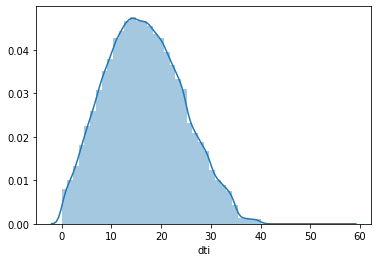

In [78]:
sns.distplot(data['dti'])

In [79]:
data['grade'].value_counts()

B    76003
C    65274
A    42265
D    40476
E    19178
F     7653
G     1937
Name: grade, dtype: int64

In [80]:
df_grade = data.groupby(['grade', 'sub_grade']).size().reset_index().pivot(columns='grade', index='sub_grade', values=0)

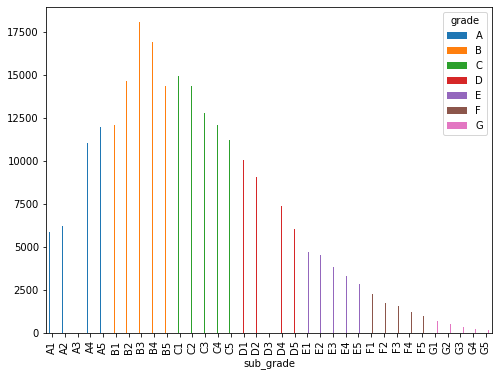

In [81]:

df_grade.plot(kind='bar',figsize=[8,6])

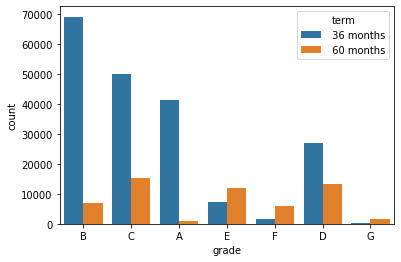

In [82]:
sns.countplot('grade',hue='term',data=data)

### As the term increases Grade also increases

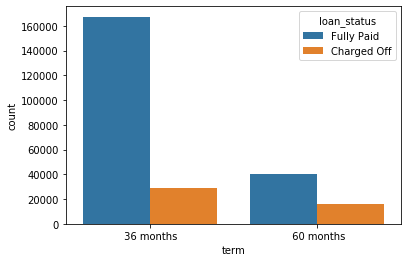

In [83]:
sns.countplot('term',hue='loan_status',data=data)

### As per desc Grade is categorization of int_rate and also sub categorized to sub grades 

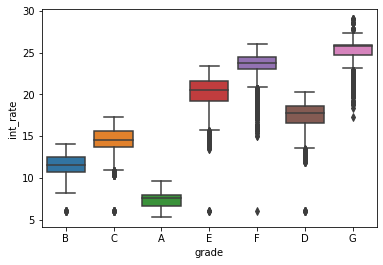

In [84]:
sns.boxplot(x='grade' ,y='int_rate',data=data)

### As the Grade increase interest increases

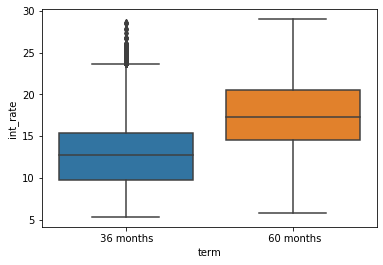

In [85]:
sns.boxplot(x='term' ,y='int_rate',data=data)

### int_rate is more for 60 months as the int rate inc term increase

[]

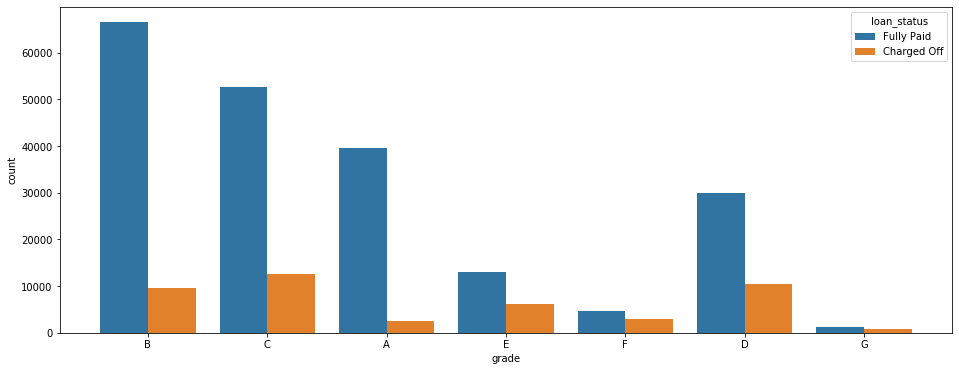

In [86]:
plt.figure(figsize=[16,6])
sns.countplot('grade',data=data,hue='loan_status')
plt.plot()

### Lower grade are less likely to pay

In [87]:
data.groupby(['grade','loan_status']).size()

grade  loan_status
A      Charged Off     2615
       Fully Paid     39650
B      Charged Off     9505
       Fully Paid     66498
C      Charged Off    12637
       Fully Paid     52637
D      Charged Off    10478
       Fully Paid     29998
E      Charged Off     6255
       Fully Paid     12923
F      Charged Off     2932
       Fully Paid      4721
G      Charged Off      792
       Fully Paid      1145
dtype: int64

In [88]:
data.isnull().sum()

loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_length                         0
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
loan_status                        0
purpose                            0
addr_state                         0
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
inq_last_6mths                     0
mths_since_last_delinq        140726
open_acc                           0
pub_rec                            0
revol_bal                          0
revol_util                       197
total_acc                          0
initial_list_status                0
t

### Details for below data
tot_coll_amt                   63606
tot_cur_bal                    63606
total_rev_hi_lim               63606
### These are nullfor inital period may be they started capturing these values later in years from dec 213 these values started getting filled up so we can remove these features as well OR else we can remove data from prior to this period , we will firest remove these features and check


In [89]:
data[data['last_pymnt_d'].isnull()]['loan_status'].value_counts()

Charged Off    527
Name: loan_status, dtype: int64

In [90]:
### last_pymnt_d is null for all the once whose status is Charged Off 

### The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

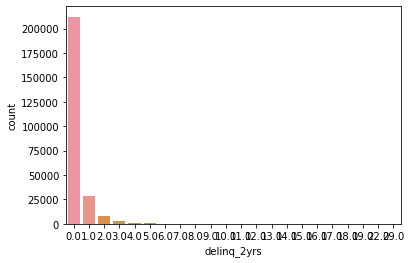

In [91]:
sns.countplot(data['delinq_2yrs'])

In [92]:
data['delinq_2yrs'].value_counts()

0.0     212089
1.0      28155
2.0       7753
3.0       2568
4.0       1039
5.0        541
6.0        263
7.0        141
8.0         86
9.0         50
10.0        30
12.0        24
11.0        20
14.0         8
15.0         4
13.0         4
18.0         4
16.0         2
17.0         2
22.0         1
19.0         1
29.0         1
Name: delinq_2yrs, dtype: int64

### inq_last_12m	Number of credit inquiries in past 12 months				

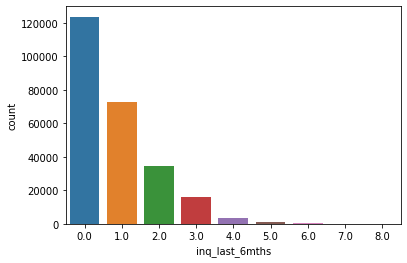

In [93]:
sns.countplot(data['inq_last_6mths'])

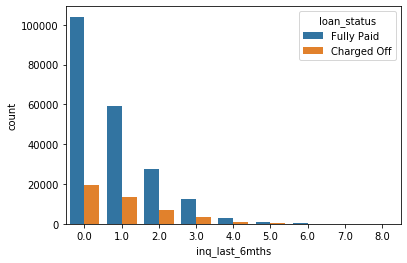

In [94]:
sns.countplot('inq_last_6mths' , data=data,hue='loan_status')

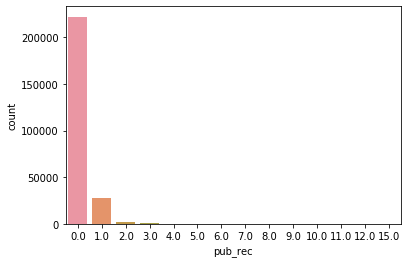

In [95]:
sns.countplot(data['pub_rec'])

In [96]:
data['pub_rec'].value_counts()

0.0     221862
1.0      27328
2.0       2547
3.0        676
4.0        202
5.0         92
6.0         39
7.0         19
8.0          8
9.0          5
10.0         5
11.0         1
12.0         1
15.0         1
Name: pub_rec, dtype: int64

In [97]:
data['total_pymnt']

0          5861.071414
1          1008.710000
2          3003.653644
3         12226.302212
5          5631.377753
              ...     
887351     1026.020000
887364    11071.870000
887366     7050.460000
887369     4158.020000
887371     2396.050000
Name: total_pymnt, Length: 252786, dtype: float64

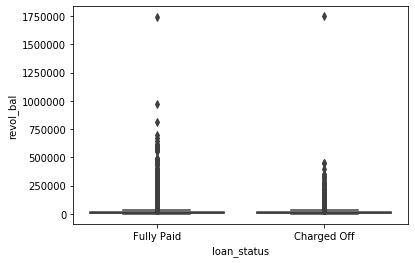

In [98]:
sns.boxplot(x='loan_status' ,y='revol_bal',data=data)

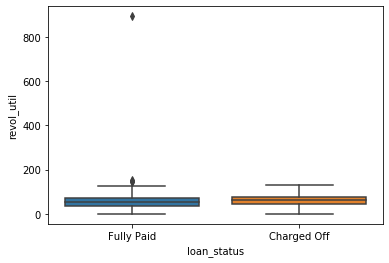

In [99]:
sns.boxplot(x='loan_status' ,y='revol_util',data=data)

In [100]:
data['revol_util'].mean()

54.31289545467235

In [101]:
data['revol_util'].median()

55.8

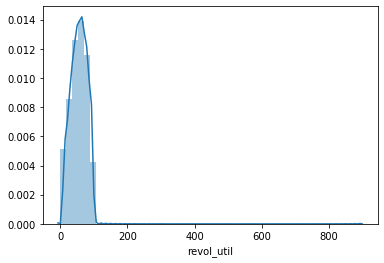

In [102]:
sns.distplot(data['revol_util'])

In [103]:
data.dropna(subset = ["revol_util"], inplace=True)

[]

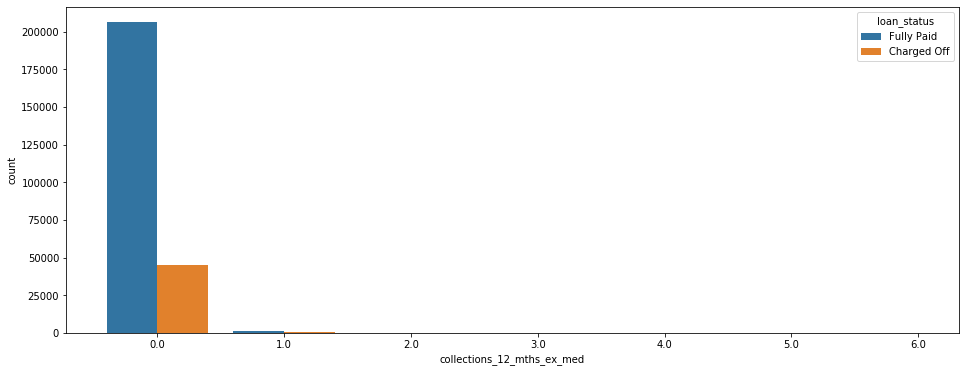

In [104]:
plt.figure(figsize=[16,6])
sns.countplot('collections_12_mths_ex_med',data=data,hue='loan_status')
plt.plot()

In [105]:
data['collections_12_mths_ex_med'].value_counts()

0.0    250961
1.0      1466
2.0        96
3.0         8
4.0         2
5.0         1
6.0         1
Name: collections_12_mths_ex_med, dtype: int64

In [106]:
data['collections_12_mths_ex_med'].isnull().sum()

54

In [107]:
data['collections_12_mths_ex_med'].fillna(0,inplace=True)

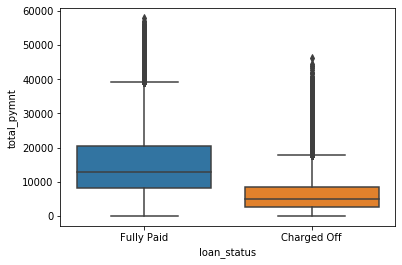

In [108]:
sns.boxplot(x='loan_status' ,y='total_pymnt',data=data)

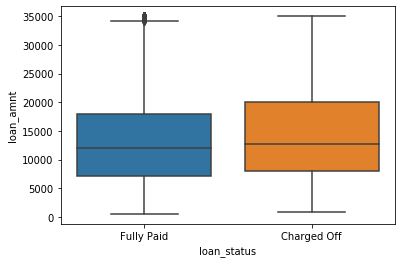

In [109]:
sns.boxplot(x='loan_status' ,y='loan_amnt',data=data)

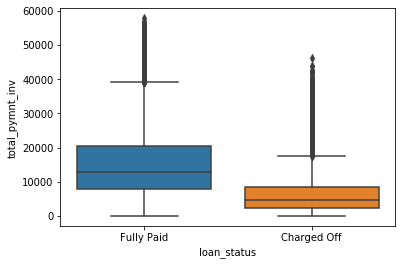

In [110]:
sns.boxplot(x='loan_status' ,y='total_pymnt_inv',data=data)

### people with more loan amonts are Charged off and low in total payment invested

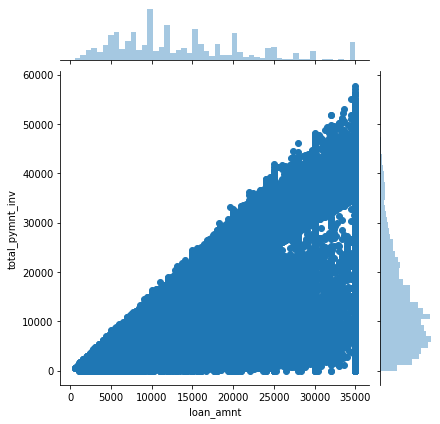

In [111]:
sns.jointplot(x=data['loan_amnt'] , y=data['total_pymnt_inv'])

In [112]:
data['loan_amnt'].corr(data['total_pymnt_inv'])

0.8401206236356349

In [113]:
data.corr()['revol_bal']

loan_amnt                     0.333703
funded_amnt                   0.332944
funded_amnt_inv               0.330504
int_rate                      0.021825
installment                   0.324964
emp_length                    0.096795
annual_inc                    0.303365
dti                           0.153221
delinq_2yrs                  -0.029621
inq_last_6mths               -0.009361
mths_since_last_delinq       -0.027273
open_acc                      0.229744
pub_rec                      -0.105111
revol_bal                     1.000000
revol_util                    0.232014
total_acc                     0.206796
total_pymnt                   0.295451
total_pymnt_inv               0.293934
total_rec_prncp               0.282929
total_rec_int                 0.198375
total_rec_late_fee            0.005919
recoveries                    0.043799
collection_recovery_fee       0.032627
last_pymnt_amnt               0.203371
collections_12_mths_ex_med   -0.010941
tot_coll_amt             

In [114]:
data_corr=data[['loan_amnt','term','installment','grade','emp_length','home_ownership','annual_inc','int_rate',
               'verification_status','purpose','dti','delinq_2yrs','inq_last_6mths',
               'total_acc','open_acc','initial_list_status','pub_rec','revol_util','revol_bal','loan_status']]

data_corr.to_csv('clean_loan_data.csv')

In [115]:
data_corr.corr()

,loan_amnt,installment,emp_length,annual_inc,int_rate,dti,delinq_2yrs,inq_last_6mths,total_acc,open_acc,pub_rec,revol_util,revol_bal
loan_amnt,1.000000,0.955154,0.114260,0.334225,0.211220,0.052252,0.008217,0.009738,0.232307,0.202042,-0.075691,0.101235,0.333703
installment,0.955154,1.000000,0.102706,0.329649,0.202621,0.053395,0.019826,0.025678,0.213921,0.197676,-0.065447,0.130400,0.324964
emp_length,0.114260,0.102706,1.000000,0.073037,0.030041,0.050118,0.031192,-0.002289,0.135898,0.051232,0.046958,0.043986,0.096795
annual_inc,0.334225,0.329649,0.073037,1.000000,-0.026020,-0.171555,0.051021,0.055683,0.205878,0.140358,-0.018638,0.024027,0.303365
int_rate,0.211220,0.202621,0.030041,-0.026020,1.000000,0.172489,0.093860,0.216892,-0.010672,0.039939,0.083094,0.342802,0.021825
dti,0.052252,0.053395,0.050118,-0.171555,0.172489,1.000000,-0.001055,0.002790,0.232619,0.309210,-0.033927,0.219729,0.153221
delinq_2yrs,0.008217,0.019826,0.031192,0.051021,0.093860,-0.001055,1.000000,0.025446,0.127131,0.056935,-0.005643,-0.015426,-0.029621
inq_last_6mths,0.009738,0.025678,-0.002289,0.055683,0.216892,0.002790,0.025446,1.000000,0.141203,0.115148,0.049295,-0.088310,-0.009361
total_acc,0.232307,0.213921,0.135898,0.205878,-0.010672,0.232619,0.127131,0.141203,1.000000,0.672168,0.030453,-0.090713,0.206796
open_acc,0.202042,0.197676,0.051232,0.140358,0.039939,0.309210,0.056935,0.115148,0.672168,1.000000,-0.012685,-0.111653,0.229744


In [116]:
mask =np.zeros_like(data_corr.corr())
indent=np.triu_indices_from(mask)
mask[indent]=True

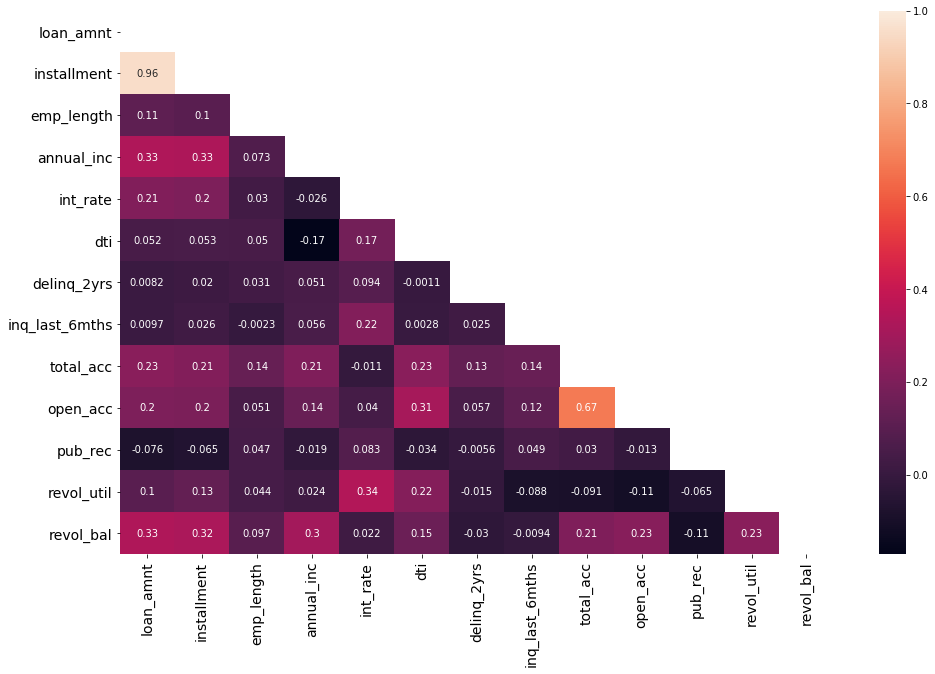

In [117]:
plt.figure(figsize=[16,10])
sns.heatmap(data_corr.corr(),annot=True,mask=mask, annot_kws={"size":10})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Details for below data 
#### tot_coll_amt                   63606
#### tot_cur_bal                    63606
#### total_rev_hi_lim               63606
### These are nullfor inital period may be they started capturing these values later in years from dec 213 these values started getting filled up so we can remove these features as well OR else we can remove data from prior to this period , we will firest remove these features and check


### total_pymnt ,	total_pymnt_inv	, total_rec_prncp , total_rec_int  are inter-related and they have strong correlation with loan_amnt which can lead to multi collinearity so can be removed form final model
### total_acc and open_acc are also correlated to each other so dropping one (total_acc)

### delinq_2yrs , inq_last_6mths, pub_rec these can be converted to Categorial variables as most of them are 0

### Setting value of Loan status as 0 for fully paid and 1 for charged off

### Data is imbalanced

In [ ]:
data.drop(['next_pymnt_d','last_pymnt_d','mths_since_last_delinq','last_credit_pull_d','Unnamed: 0',
           'earliest_cr_line','issue_d','addr_state','issue_month','issue_year'],axis=1,inplace=True)

In [ ]:
data['delinq_2yrs']=np.where(data['delinq_2yrs']>0,'Y','N')
data['inq_last_6mths']=np.where(data['inq_last_6mths']>0,'Y','N')

In [ ]:
data.drop(['funded_amnt','funded_amnt_inv','total_acc','total_pymnt','total_pymnt_inv','total_rec_prncp','installment'],axis=1, inplace=True)